In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import requests, zipfile, io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as m
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(9,6)})

In [3]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [4]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [5]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [6]:
X = data[['X_1', 'X_2']]
y = data.Y

In [7]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

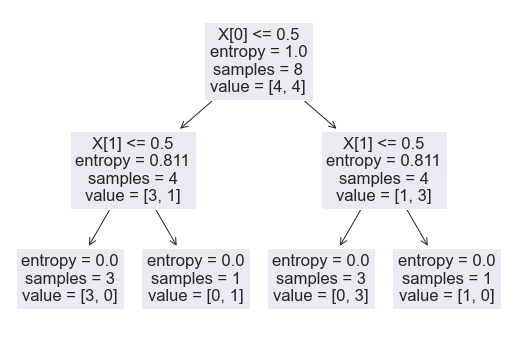

In [8]:
tree.plot_tree(clf.fit(X, y));

2.2

Расчет энтропии

In [9]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/dogs.csv", index_col=0)

In [10]:
df

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик


In [11]:
(1/1)*m.log2((1/1)) - 0

0.0

In [12]:
-(4/9)*m.log2((4/9)) - (5/9)*m.log2((5/9))

0.9910760598382222

In [14]:
0 - (5/5)*m.log2((5/5))

0.0

In [15]:
-(4/5)*m.log2((4/5)) - (1/5)*m.log2((1/5))

0.7219280948873623

In [16]:
0 - (6/6)*m.log2((6/6))

0.0

In [17]:
-(4/4)*m.log2((4/4)) - 0

-0.0

2.3

In [11]:
titanic = pd.read_csv("titanic_train.csv")

In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [15]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [16]:
X = pd.get_dummies(X) 

In [17]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [18]:
X = X.drop(['Sex_male'], axis=1)

In [19]:
X = X.fillna({'Age': X.Age.median()})

In [20]:
y = titanic['Survived']

In [21]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [22]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [23]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [24]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

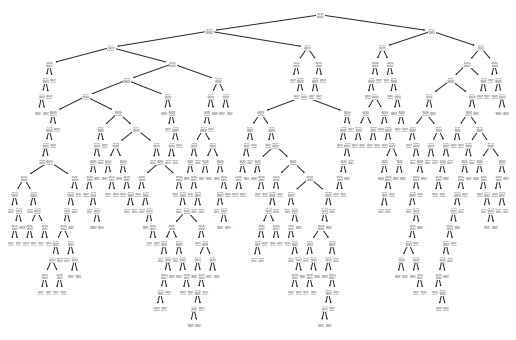

In [25]:
tree.plot_tree(clf.fit(X, y));#переобучение 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [27]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [29]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [30]:
clf.score(X_train, y_train)

0.8238255033557047

In [31]:
clf.score(X_test, y_test)

0.8203389830508474

2.4

In [34]:
scores_data = pd.DataFrame()

In [35]:
max_depth_values = range(1,100)

In [37]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [38]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.802073


<AxesSubplot:xlabel='max_depth', ylabel='score'>

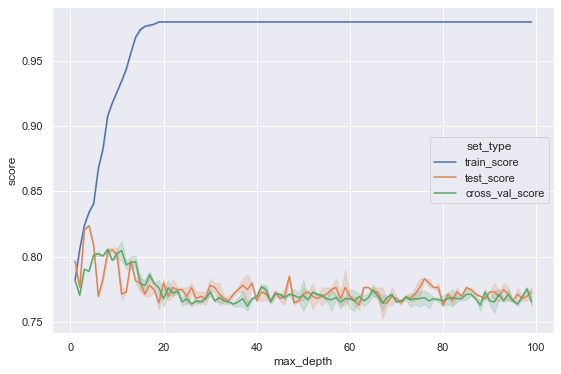

In [39]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score','test_score','cross_val_score'], var_name = 'set_type', value_name = 'score')

sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [40]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
589,95,cross_val_score,0.765154
590,96,cross_val_score,0.765140
591,97,cross_val_score,0.768515
592,98,cross_val_score,0.773557


In [41]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [42]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

In [43]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [44]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7694915254237288

Ah shit, here we go again

Iris

In [45]:
iris_train = pd.read_csv("https://stepik.org/media/attachments/course/4852/train_iris.csv", index_col=0)

In [46]:
iris_train.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [47]:
X_train = iris_train.drop(['species'], axis=1)

In [48]:
X_train

,sepal length,sepal width,petal length,petal width
130,7.4,2.8,6.1,1.9
7,5.0,3.4,1.5,0.2
11,4.8,3.4,1.6,0.2
142,5.8,2.7,5.1,1.9
109,7.2,3.6,6.1,2.5
...,...,...,...,...
147,6.5,3.0,5.2,2.0
124,6.7,3.3,5.7,2.1
123,6.3,2.7,4.9,1.8
146,6.3,2.5,5.0,1.9


In [49]:
y_train = iris_train.drop(['sepal length','sepal width','petal width','petal length'], axis=1)

In [50]:
y_train.head()

,species
130,2
7,0
11,0
142,2
109,2


In [51]:
iris_test = pd.read_csv("https://stepik.org/media/attachments/course/4852/test_iris.csv", index_col=0)

In [52]:
iris_test.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [53]:
X_test = iris_test.drop(['species'], axis=1)

In [54]:
X_test.head()

,sepal length,sepal width,petal length,petal width
114,5.8,2.8,5.1,2.4
70,5.9,3.2,4.8,1.8
138,6.0,3.0,4.8,1.8
59,5.2,2.7,3.9,1.4
44,5.1,3.8,1.9,0.4


In [55]:
y_test = iris_test.drop(['sepal length','sepal width','petal width','petal length'], axis=1)

In [56]:
y_test.head()

,species
114,2
70,1
138,2
59,1
44,0


In [57]:
scores_iris = pd.DataFrame()

In [58]:
max_iris_depth_values = range(1,100)

In [59]:
np.random.seed(0)

In [60]:
for max_depth in max_iris_depth_values:
    my_awesome_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    my_awesome_tree.fit(X_train, y_train)
    
    train_score = my_awesome_tree.score(X_train, y_train)
    test_score = my_awesome_tree.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    scores_iris = scores_iris.append(temp_score_data)

In [61]:
scores_iris

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92
...,...,...,...
0,95,1.00,0.92
0,96,1.00,0.92
0,97,1.00,0.92
0,98,1.00,0.94


<AxesSubplot:xlabel='max_depth', ylabel='score'>

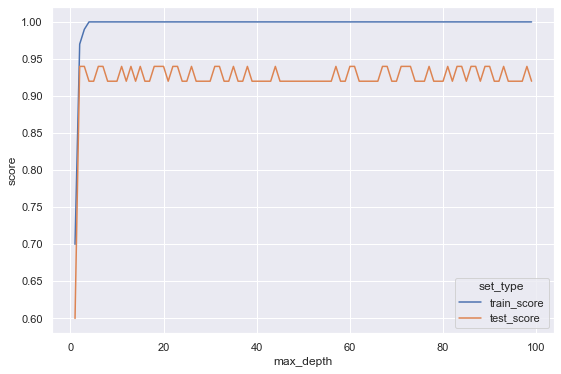

In [62]:
scores_data_long = pd.melt(scores_iris, id_vars = ['max_depth'], value_vars = ['train_score','test_score'], var_name = 'set_type', value_name = 'score')

sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [63]:
cats_dogs = pd.read_csv("https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv")

In [64]:
cats_dogs.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [65]:
cats_dogs['Вид']

0      собачка
1      собачка
2      собачка
3      собачка
4      собачка
        ...   
995      котик
996      котик
997      котик
998      котик
999      котик
Name: Вид, Length: 1000, dtype: object

In [66]:
X = cats_dogs.drop(['Вид'], axis=1)

In [67]:
y = cats_dogs.drop(['Длина','Высота','Шерстист','Гавкает','Лазает по деревьям'], axis=1)

In [68]:
y = pd.get_dummies(y)

In [69]:
y = y.drop(['Вид_котик'], axis=1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [71]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [72]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

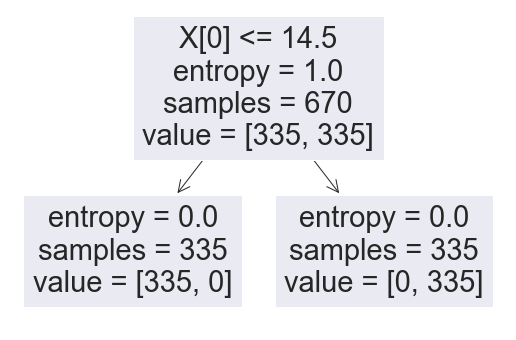

In [73]:
tree.plot_tree(clf.fit(X_train, y_train));

In [74]:
df_ts = pd.read_json(r'dataset_209691_15.txt')

In [75]:
df_ts.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,32,38.4,1,1,0
1,28,33.6,1,1,0
2,34,40.8,1,1,0
3,22,26.4,1,1,0
4,29,34.8,1,1,0


In [76]:
X_ts = df_ts[['Длина','Высота','Шерстист','Гавкает','Лазает по деревьям']]

In [77]:
result = clf.predict(X_ts)

In [78]:
result.sum() #кол-во собак

58

Random forest

In [79]:
np.random.seed(0)

In [80]:
rf = RandomForestClassifier(10, max_depth=5)

In [81]:
df = pd.read_csv("heart.csv")

In [82]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [83]:
df.shape

(303, 14)

In [84]:
X = df.drop(['target'], axis=1)

In [85]:
y = df['target']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [87]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

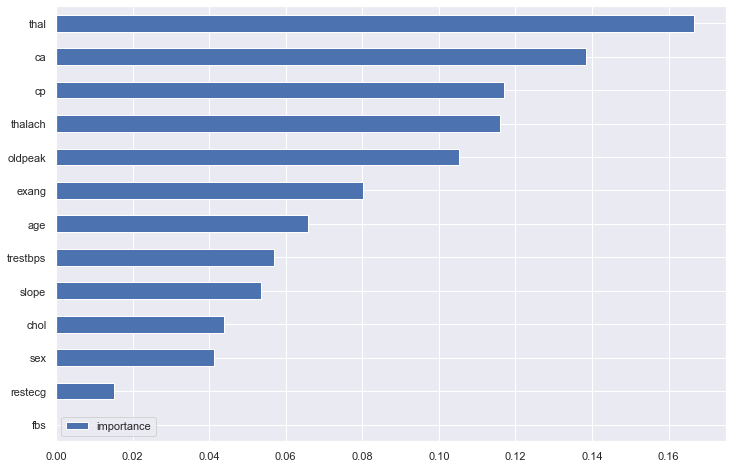

In [88]:
imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8));

In [89]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/training_mush.csv")

In [90]:
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [134]:
X = df.drop(['class'], axis=1)

In [135]:
y = df['class']

In [118]:
np.random.seed(0)

In [91]:
parametrs = {'n_estimators' : range(10,50,10),
             'max_depth': range(1,12,2),
             'min_samples_leaf' : range(1,7),
             'min_samples_split' : range(2,9,2)}

In [119]:
clf_rf = RandomForestClassifier()

In [120]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1)

In [121]:
grid_search_cv_clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [139]:
rf = grid_search_cv_clf.best_estimator_

In [140]:
rf.fit(X,y)

RandomForestClassifier(max_depth=9, n_estimators=10)

In [141]:
rf.feature_importances_

array([0.01045903, 0.00725969, 0.008798  , 0.06447653, 0.10166754,
       0.00357725, 0.05550434, 0.09816254, 0.08259596, 0.02104627,
       0.10054772, 0.06461475, 0.03959095, 0.00339708, 0.01975571,
       0.        , 0.00059038, 0.00824168, 0.09072938, 0.08777018,
       0.08726501, 0.04395   ])

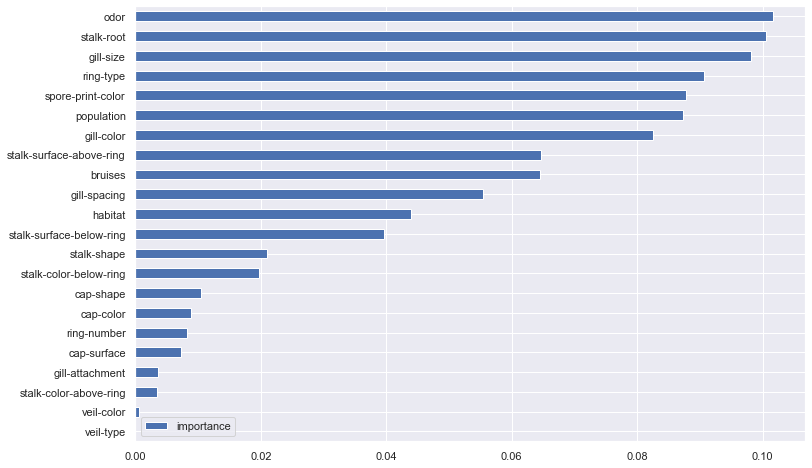

In [142]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8));

In [143]:
X = pd.read_csv("https://stepik.org/media/attachments/course/4852/testing_mush.csv")

In [130]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
2027,5,2,8,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,1
2028,5,3,3,0,2,1,0,0,3,0,...,1,6,0,0,2,1,2,1,4,4
2029,5,3,3,1,5,1,0,0,9,1,...,2,3,3,0,2,1,4,3,4,0


In [146]:
pd.DataFrame(rf.predict(X)).value_counts()

0    1055
1     976
dtype: int64

In [145]:
y_pred = rf.predict(X)

In [150]:
url = "https://stepik.org/media/attachments/course/4852/testing_y_mush.csv.zip"
r = requests.get(url)

In [152]:
z = zipfile.ZipFile(io.BytesIO(r.content))
txtfiles = z.namelist()

In [155]:
y_true = pd.read_csv(z.open(txtfiles[0], "r", pwd="Cool!Move_forward!".encode('cp850', 'replace')))

<AxesSubplot:>

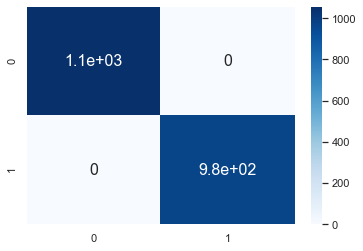

In [158]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_true, y_pred)), annot=True,annot_kws={"size": 16}, cmap="Blues")

In [159]:
earth = pd.read_csv("https://stepik.org/media/attachments/course/4852/invasion.csv")

In [160]:
earth

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [161]:
X_train = earth.drop(['class'], axis=1)

In [165]:
transport = {'transport' :  0,  'fighter' :  1,  'cruiser' : 2}
y_train = earth['class'].map(transport)

In [166]:
parametrs = {'n_estimators' : range(10,50,10),
             'max_depth': range(1,12,2),
             'min_samples_leaf' : range(1,7),
             'min_samples_split' : range(2,9,2)}

In [167]:
clf_rf = RandomForestClassifier()

In [168]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5, n_jobs=-1)

In [170]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [171]:
grid_search_cv_clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [176]:
rf = grid_search_cv_clf.best_estimator_

In [175]:
X_test = pd.read_csv("https://stepik.org/media/attachments/course/4852/operative_information.csv")

In [177]:
pd.DataFrame(rf.predict(X_test)).value_counts()

1    675
0    595
2    230
dtype: int64

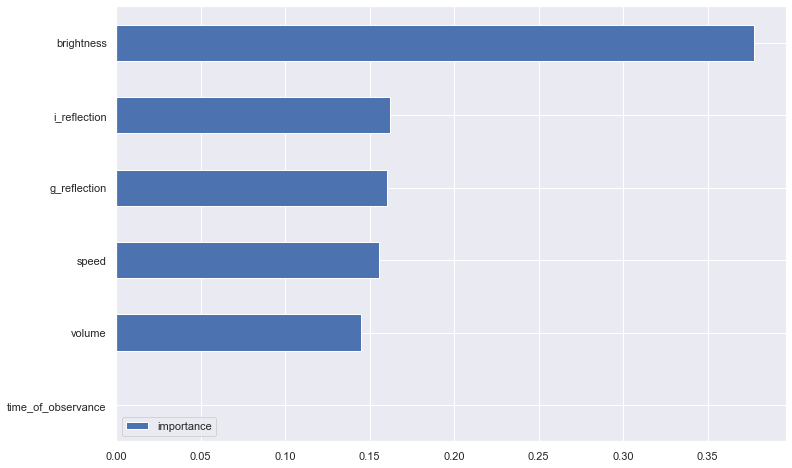

In [178]:
imp = pd.DataFrame(rf.feature_importances_, index=X_test.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8));

In [179]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv")

In [180]:
df

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
...,...,...,...,...,...,...,...,...
99995,301.7,249.0,39.8244,0.397064,0,1,1,1
99996,194.0,350.0,25.6080,-1.062202,0,1,1,1
99997,201.4,112.0,26.5848,1.571040,0,1,1,1
99998,7.8,115.0,1.0296,-1.206575,0,1,1,1


<AxesSubplot:>

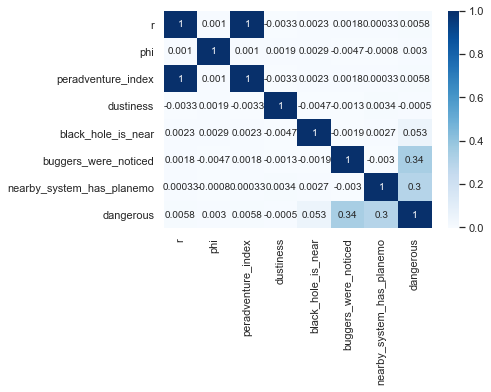

In [184]:
sns.heatmap(df.corr(),cmap="Blues", annot=True)